# Telco Exploratory Data Analysis

### Author: Pranav Jonnavithula

### Basic Exploration

In [1]:
# Importing relevant libraries
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats 
from scipy.stats import chi2_contingency
import numpy as np
from array import array


In [2]:
# Loading the datasets
telco_data_main = pd.read_excel("../Data/Raw_Data/CustomerChurn.xlsx")
telco_demographics = pd.read_excel("../Data/Raw_Data/Telco_customer_churn_demographics.xlsx")
telco_location = pd.read_excel("../Data/Raw_Data/Telco_customer_churn_location.xlsx")

# Joining the datasets on Customer ID
telco_data_new = telco_data_main.merge(telco_demographics, how='left')
telco_data = telco_data_new.merge(telco_location,how='left')

# Assessing the shape of the dataset
shape  = telco_data.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns\n")

# Viewing the columns and their data types
column_headers = telco_data.columns.to_list()
print(f"The columns in this dataset are listed below:\n{column_headers}\n")
print(f"Here are the data types of each columns:\n{telco_data.dtypes}\n")

The dataset has 7043 rows and 35 columns

The columns in this dataset are listed below:
['LoyaltyID', 'Customer ID', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn', 'Count', 'Gender', 'Age', 'Under 30', 'Married', 'Number of Dependents', 'Location ID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude']

Here are the data types of each columns:
LoyaltyID                 int64
Customer ID              object
Senior Citizen           object
Partner                  object
Dependents               object
Tenure                    int64
Phone Service            object
Multiple Lines           object
Internet Service         object
Online Security          object
Online Backup            object
Device Prot

#### Assessing Missing Values

In [3]:
# Finding missing values
missing = telco_data.isnull().sum()
print(f"Columns with missing values:\n{missing}\n")

# Removing rows with missing values
telco_data.dropna(how = 'any',inplace=True)
missing = telco_data.isnull().sum()
print(f"Updated Columns:\n{missing}\n")

Columns with missing values:
LoyaltyID                 0
Customer ID               0
Senior Citizen            0
Partner                   0
Dependents                0
Tenure                    0
Phone Service             0
Multiple Lines            0
Internet Service          0
Online Security           0
Online Backup             0
Device Protection         0
Tech Support              0
Streaming TV              0
Streaming Movies          0
Contract                  0
Paperless Billing         0
Payment Method            0
Monthly Charges           0
Total Charges             0
Churn                     0
Count                   551
Gender                  551
Age                     551
Under 30                551
Married                 551
Number of Dependents    551
Location ID             551
Country                 551
State                   551
City                    551
Zip Code                551
Lat Long                551
Latitude                551
Longitude          

In [4]:
# Checking Total Charges Column for inconsistent data types
telco_data[telco_data['Total Charges']==' ']

# Dropping the rows with these missing values
telco_data=telco_data[telco_data['Total Charges'].str.strip()!='']

# Converting the column to numeric data type
telco_data['Total Charges'] = pd.to_numeric(telco_data['Total Charges'])

#### Summary Statistics

In [5]:
# Printing Summary Statistics for the numeric columns
round(telco_data.describe(),2)

,LoyaltyID,Tenure,Monthly Charges,Total Charges,Count,Age,Number of Dependents,Zip Code,Latitude,Longitude
count,6485.00,6485.00,6485.00,6485.00,6485.0,6485.00,6485.00,6485.00,6485.00,6485.00
mean,550733.68,32.12,64.28,2254.41,1.0,46.75,0.50,93526.81,36.24,-119.80
std,260537.12,24.52,30.31,2269.53,0.0,16.86,0.98,1848.63,2.47,2.16
min,100346.00,1.00,18.25,18.85,1.0,19.00,0.00,90001.00,32.56,-124.30
25%,323609.00,9.00,34.30,383.65,1.0,33.00,0.00,92109.00,34.00,-121.83
50%,549991.00,28.00,70.10,1372.45,1.0,46.00,0.00,93552.00,36.40,-119.74
75%,776270.00,55.00,89.85,3726.15,1.0,60.00,0.00,95338.00,38.20,-117.99
max,999912.00,72.00,118.75,8684.80,1.0,80.00,9.00,96150.00,41.96,-114.19


### Basic Churn and Correlation Analysis

In [6]:
# Overall Churn Count and Rate
overall_churn_count = telco_data.groupby(['Churn']).size()
print(f"Overall Churn Count:\n{overall_churn_count}\n")

overall_churn_rate = (telco_data.groupby(['Churn']).size())/(telco_data.shape[0])
print(f"Overall Churn Proportion:\n{overall_churn_rate}\n")

Overall Churn Count:
Churn
No     4904
Yes    1581
dtype: int64

Overall Churn Proportion:
Churn
No     0.756207
Yes    0.243793
dtype: float64



<Axes: >

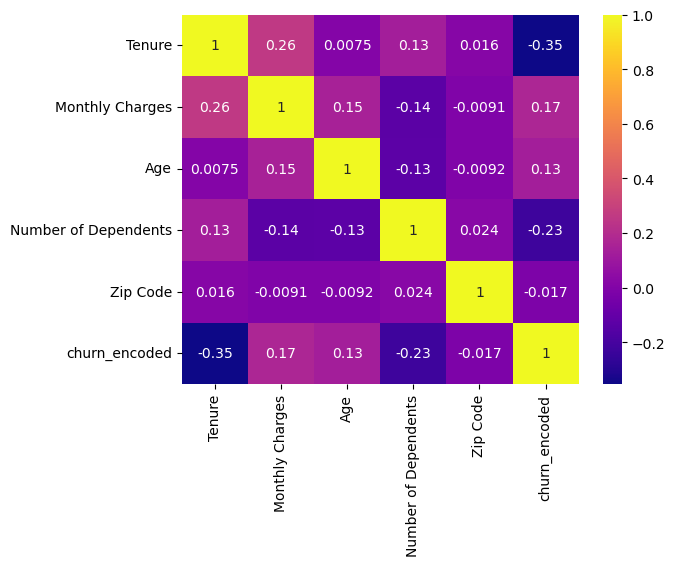

In [7]:
# Creating a new column to encode the Churn column where 'Yes'=1 and 'No'=0
telco_data['churn_encoded'] = telco_data['Churn'].replace(('Yes','No'),(1, 0))

# Creating a new dataframe with only columns that are relevant to my matrix
matrix_df = telco_data[['Tenure','Monthly Charges','Age', 'Number of Dependents', 'Zip Code','churn_encoded']]

# Creating the correlation matrix 
matrix = matrix_df.corr()

# Creating and plotting the heatmap of the correlation matrix
corr_heatmap = sb.heatmap(matrix, cmap = 'plasma', annot = True)
corr_heatmap

### Observations and Analysis
The above correlation heatmap showcases that the two numeric variables that positively impact churn are monthly charges and age with correlation statistics of 0.17 and 0.13 respectively. The variables that most negatively impact churn are Tenure and Number of Dependents with correlation statistics of -0.35 and -0.23 respectively. 

### Recommendations
Telco must therefore focus on reducing their monthly charges for their customers and attract a younger customer base to reduce their churn rate. Additionally, Telco must attract customers with an increasing number of dependents to ensure they lower their churn rate.

In [8]:
# Correlation between categoerical variables and churn
matrix_df_cat = telco_data[['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines',
                            'Internet Service','Online Security','Online Backup','Device Protection',
                            'Tech Support','Streaming TV', "Streaming Movies",'Contract','Paperless Billing',
                            'Payment Method','Under 30','Married','Churn']]

def calc_correlation(var_list):
    """A function to calculate the Chi-Squared Coefficients and P-Value's of the above variables on Churn"""

    # Initializing lists to store variables and their statistics
    x_statistics = []
    p_vals = []
    Degrees_of_freedom = []
    variables = []
    correlations = []

    for var in var_list:
        # Creating a contingency table to input into a chi-squared function
        crosstab = pd.crosstab(
            index = telco_data[var], 
            columns = telco_data['Churn']
            )
        
        chi_sq_result = chi2_contingency(crosstab)

        # Obtaining the x statistic, p value and Degrees of Freedom
        x = chi_sq_result[0]
        p_val =  chi_sq_result[1]
        correlation = "correlated" if p_val <0.05  else "not correlated"
        dof = chi_sq_result[2]

        # Adding the above variables to each list, and rounding as needed. 
        x_statistics.append(round(x,2))
        p_vals.append(p_val)
        correlations.append(correlation)
        Degrees_of_freedom.append(dof)
        variables.append(var)

    # Creating a dataframe of all of the variables and their correlations to Churn
    chi_sq_df = {
        'Variable':variables,
        'Correlation':correlations,
        'Statistic':x_statistics,
        'P_values':p_vals,
        'Degrees_of_freedom':Degrees_of_freedom
    }

    chi_sq_df = pd.DataFrame(chi_sq_df)
    chi_sq_df.set_index('Variable', inplace=True) # Setting the variable name as the index of the DF
    chi_sq_df['P_values'] = chi_sq_df['P_values'].apply(lambda x: "{:.2e}".format(x)) # Setting the P_values column to scientific notation

    print("Table of Correlations:")
    return chi_sq_df
       
calc_correlation(matrix_df_cat)

Table of Correlations:


,Correlation,Statistic,P_values,Degrees_of_freedom
Variable,,,,
Senior Citizen,correlated,187.06,1.40e-42,1
Partner,correlated,233.61,9.74e-53,1
Dependents,correlated,446.82,3.56e-99,1
Phone Service,not correlated,0.25,6.14e-01,1
Multiple Lines,correlated,9.64,8.06e-03,2
Internet Service,correlated,542.82,1.34e-118,2
Online Security,correlated,705.51,6.32e-154,2
Online Backup,correlated,519.94,1.25e-113,2
Device Protection,correlated,485.74,3.34e-106,2


### Observations and Analysis
From the table of correlation values for each variable, we can see that the only variable not correlated to churn with a chi-squared contingency test is Phone Service with a test statistic of 0.27 and a P-value of 0.6. This indicates that there are many factors influencing churn rate at Telco and a deeper analysis may be needed to decrease churn.

## Customer Demographic Analysis

#### Age Analysis

In [11]:
def create_churn_data(data):
    """A function to create data to display in a chart"""

    # Creating a table to show proportion of churned customer at each age
    churn_data = telco_data.groupby('Age')['Churn'].value_counts(normalize=True).unstack()

    # Summing the total number of customers per each age group
    y_bar = telco_data.groupby('Age').size().tolist()

    # Creating a new column in churn_data to display number of customers per age group
    churn_data['age_size'] = telco_data.groupby('Age').size().tolist()

    return churn_data


def create_plot(data):
    """A function that created a multi axis plot"""

    # Obtaining churn_data from the previous function
    churn_data = create_churn_data(data)
    
    # Creating a blank figure to display the plot
    fig = make_subplots(specs = [[{'secondary_y':True}]])

    # Adding a histogram to the plot
    fig.add_trace(
        go.Histogram(
            x = telco_data['Age'], # Age groups are on the x axis
            name = "Age Count", 
            xbins = { # Setting the bin sizes
                'start':19, 
                'end': max(churn_data.index),
                'size':2
            },
            texttemplate='%{y}', # Displaying the count of customers per age group on the bar
            textangle = 0),
            secondary_y = False
    )

    # Adding a line plot to the plot on a secondary y axis
    fig.add_trace(
        go.Scatter(
            x = churn_data.index.to_list(),
            y = churn_data['Yes'],
            name = "Churn Proportion"),
            secondary_y = True
    )

    # Creating the axis titles
    fig.update_layout(
        xaxis_title = 'Age',
        yaxis = {'title':'Number of Customers',
                'side':'left'
                },
        yaxis2 = {'title':'Churn Proportion',
                'side':'right',
                'range': [0,1],
                'overlaying':'y',
                'tickmode':'auto'
                },
        template = 'simple_white',
        hovermode = 'x unified',
        title = "Customer Count and Churn Proportion by Age"    
    )

    # Displaying the plot
    fig.show()
    fig.write_image("/Users/pranav/Desktop/Github/Telco-Churn-Prediction/Images/EDA_plots/Customer_count_and_churn_proportion_by_age.png")
    
create_plot(telco_data)

![Customer count and churn proportion by age](../Images/EDA_plots/Customer_count_and_churn_proportion_by_age.png)

### Observations and Analysis
The histogram depicting the age distributions of Telco customers portrays an approximatately uniform distribution of ages from 19 to 64 years old. The age distributions from 65 to 80 are much lower than that of 19-64. However, the age distributions from 65-80 are relatively uniform. The churn proportion is relatively uniform from the ages 19-64, averaging around 15%-27% churned. This percentage increases to 25%-45% during the age ranges of 65-80.

### Recommendations
Based on my analysis, while the churn rate is greater for elderly customers, Telco should still focus its customer retention strategies on its younger customers to maximize ROI and decrease customer churn. Since Telco has a larger customer base in the younger age groups, decreasing churn in this subgroup would yield the biggest impact on the compant

In [16]:
# Summary statistics table for mean age of churned customers vs retained customers
round(telco_data[["Churn", "Age"]].groupby("Churn").mean(),1)

,Age
Churn,
No,45.5
Yes,50.6


### Observations and Analysis
The table above showcases a slight difference of approximately 5 yeats between the mean ages of churned and unchurned customers. The finding suggests that age of a customer may not significantly impact the probability that a customer may churn. The correlation plot below will further analyse my hypothesis

#### Gender Analysis

In [12]:
# Plotting the gender distribution in the dataset
fig = px.histogram(
    telco_data, 
    x='Gender', 
    title='Gender Distribution in the Telco Dataset', 
    color = "Gender", 
    template = 'simple_white', 
    text_auto='.2s', # the text will have 2 decimal points with scientific notation
    height = 500
    )

fig.update_layout(
    xaxis_title = "Gender", 
    yaxis_title = "Number of Customers"
    )

fig.update_traces(
    textfont_size = 12, 
    textposition='outside'
    )

fig.show()
fig.write_image("/Users/pranav/Desktop/Github/Telco-Churn-Prediction/Images/EDA_plots/Gender_distribution_telco_dataset.png")



![Gender Distribution in the telco dataset](../Images/EDA_plots/Gender_distribution_telco_dataset.png)

### Observations and Analysis
Based on the chart above, there is no significant difference between the number of Males and Females in the dataset

In [13]:
# Creating a new column to encode the Churn column where 'Yes'=1 and 'No'=0
telco_data['churn_encoded'] = telco_data['Churn'].replace(('Yes','No'),(1, 0))

# Plotting the churn rate based on gender
fig = px.histogram(
    telco_data, 
    x="Gender", 
    y="churn_encoded", 
    title = "Churned Customers per Gender", 
    color ='Gender',
    template = 'simple_white', 
    text_auto = True, 
    height = 500
    
    )
fig.update_traces(
    textfont_size = 12, 
    textposition = 'outside'
    )

fig.update_layout(
    xaxis_title = 'Gender', 
    yaxis_title = 'Number of Churned Customers'
    )

fig.show()
fig.write_image("/Users/pranav/Desktop/Github/Telco-Churn-Prediction/Images/EDA_plots/Churned_customers_per_gender.png")


![Churned Customers per gender](../Images/EDA_plots/Churned_customers_per_gender.png)

### Observations and Analysis
There seems to be no major difference in churn rate by gender in the data set

In [19]:
# Creating a table showcasing churn rate for males and females
gender_churn_crosstab = pd.crosstab(telco_data['Churn'], telco_data['Gender'])
print(f"A table depicting the breakdown of churn status by gender:\n\n{gender_churn_crosstab}\n")

A table depicting the breakdown of churn status by gender:

Gender  Female  Male
Churn               
No        2422  2482
Yes        788   793



In [20]:
# Creating a table showcasing churn counts for males and females
gender_churn_table_count = telco_data.groupby(['Churn','Gender']).size()
print(f"Count of Churned Customers by Gender:\n{gender_churn_table_count}\n")

# Creating a table showcasing the churn rate for males and females
gender_churn_table_prop = (telco_data.groupby(['Churn','Gender']).size())/ (telco_data.groupby('Gender').size())
print(f"Proportion of Churned Customers by Gender:\n{gender_churn_table_prop}\n")


Count of Churned Customers by Gender:
Churn  Gender
No     Female    2422
       Male      2482
Yes    Female     788
       Male       793
dtype: int64

Proportion of Churned Customers by Gender:
Churn  Gender
No     Female    0.754517
       Male      0.757863
Yes    Female    0.245483
       Male      0.242137
dtype: float64



The proportion of churned customers by gender does not significantly change based on the gender of the customer. This may indicate that Gender does not have a significant effect on determining whether a customer will churn at Telco. 

#### Geographic Analysis

In [19]:
def obtain_cities_and_proportions(data):
    """A function to obtain the top 10 cities and their churn proportions as a table and list"""
    
    # Obtaining the top 10 cities with the most telco customers
    top_10_cities = pd.DataFrame(data['City'].value_counts()[:10])
    top_10_cities_list = top_10_cities.index.to_list() 

    # Getting the churn rate of the top 10 cities as a table
    churn_by_city = telco_data[data['City'].isin(top_10_cities_list)].groupby('City')['Churn'].value_counts(normalize=True).unstack().fillna(0)

    # Adding the customer count per city to the "churn_by_city" table
    churn_by_city['Customers'] = top_10_cities['City']

    # Sorting the cities in "churn_by_city" table to the same order as the "top_10_cities_list"
    sorted_churn_by_city = churn_by_city.reindex(top_10_cities_list)

    return top_10_cities_list, sorted_churn_by_city


def create_multi_axis_plot(data):
    """A function to create the multi axis plot to display customer count and churn rate for the top 10 cities of Telco"""
    
    # Running the previous function to obtain the top 10 cities and churn by city table
    results = obtain_cities_and_proportions(data)
    top_10_cities = results[0]
    churn_by_city = results[1]

    # Creating a blank figure with a secondary y axis
    fig = make_subplots(specs = [[{'secondary_y':True}]])

    # Adding the bar plot (customer count) and line plot (customer churn) to the blank figure
    fig.add_trace(
        go.Bar(
            x = churn_by_city.index, # City names in the x axis
            y = churn_by_city['Customers'], # Customer count in the y axis
            name = "Customer Count",
            text = churn_by_city['Customers']), 
            secondary_y = False,
            )
    
    fig.add_trace(
        go.Scatter(
            x = churn_by_city.index, # City names as the x axis
            y = churn_by_city['Yes'].to_list(), # Proportion of churned customers ('Yes') on y axis
            name = "Churn Rate"), 
            secondary_y=True # Create secondary y axis
            )
    
    # Configuring the chart
    fig.update_layout(
        xaxis_title = 'City',
        yaxis = {'title':"Customer Count", 
                 "side":'left',
                   "range":[0,250]
                   }, # configuring the first y axis
        yaxis2 = {'title':'Churn Proportion',
                  'side':'right',
                  'range':[0,1], 
                  "overlaying":'y',
                  'tickmode':'auto'}, # Configuring the second y axis
        template = 'simple_white',
        hovermode = 'x unified',
        title = "Telco Customer Count and Churn Rate"
        )

    # Displaying the chart
    fig.show()
    fig.write_image("/Users/pranav/Desktop/Github/Telco-Churn-Prediction/Images/EDA_plots/Telco_customer_count_and_churn_rate.png")

    
# Analyzing the countries available in this dataset
unique_countries = telco_data['Country'].unique()
print("The countries available in this dataset are:")
print(unique_countries)

# Analyzing the unique state's available in this dataset
unique_states = telco_data['State'].unique()
print("\nThe state's available in this dataset are:")
print(unique_states)

# Calling the function to create the chart
create_multi_axis_plot(telco_data)

The countries available in this dataset are:
['United States']

The state's available in this dataset are:
['California']


![Telco customer count and churn rate](../Images/EDA_plots/Telco_customer_count_and_churn_rate.png)

### Observations and Analysis
From the graph above, there are 3 main categories of customer population among the top 10 cities with Telco customers. LA and San Diego have the highest level of customers with 252 and 250 customers respectively. The next "category" contains San Jose, Sacramento, and San Francisco, with 105, 104, and 101 customers respectively. Finally, the last category's customer count ranges from 43 to 56. The customer churn proportion is relatively uniform across all of the 10 cities, apart from an outlier in San Diego. Most of the cities churn proportion ranges from 0.2 to 0.3, while San Diego has a churn proportion of 0.63.

### Recommendations
Based on the analysis, I would recommend that Telco focus their customer retention strategies on San Diego. This is because San Diego is Telco's second most populous city in terms of customer count, and has an extremely high churn rate compared to other populous cities. Reducing customer churn in San Diego will certainly create a positive impact on Telco Revenues. 

In [22]:
# Creating a table to show the states with the greatest churn rate
top_churned_cities = telco_data.groupby('City')['Churn'].value_counts(normalize=True).unstack().fillna(0)

# Sorting the values to show the top 12 highest churning cities for Telco. 
top_churned_cities.sort_values(ascending=False, by='Yes').head(12)

Churn,No,Yes
City,,
Twain,0.000000,1.000000
South Lake Tahoe,0.000000,1.000000
Eldridge,0.000000,1.000000
Corona Del Mar,0.000000,1.000000
Riverbank,0.000000,1.000000
Sierra City,0.000000,1.000000
Smith River,0.000000,1.000000
Grizzly Flats,0.000000,1.000000
Wrightwood,0.000000,1.000000


The above 11 cities (Twain to Johannesburg) all have a 100% churn rate. If Telco would like to decrease churn rate, it may need to investigate and analyze customers in these 11 cities

## Telco Service Analysis

In [16]:
def create_churn_bar(data, service_col):
    """A function to create the churn elements to input into a stacked bar chart"""

    # Creating X and Y lists to input into plotly graphs later
    x_categories = data.groupby(service_col)['Churn'].value_counts(normalize=True).unstack().fillna(0).index.to_list() # Creating a list of each values for each service
    y_categories = data.groupby(service_col)['Churn'].value_counts(normalize=True).unstack().fillna(0) # Creating a table of churn proportions for the given service name

    # Creating lists of churn proportions to input into plotly graphs later
    no_churn = y_categories['No'].tolist() # A list of proportions for customers who didnt churn in this service line
    churned = y_categories['Yes'].tolist() # A list of proportions for customers who churned in this service line

    return x_categories, no_churn, churned
    

def initialize_subplot(data, services):
    """A function used to initialize a 3x3 grid to showcase churn rate"""

    # Initializing an empty list to store the output of the "create_chun_bar" function
    bar_chart_list = []

    # Changing the name of the services to use as titles for each of the plots
    services_new = [service+' Churn Proportion' for service in services]

    # Iterating through each service and running the "create_chun_bar" function on it
    for service in services:
        churn_data = create_churn_bar(data, service)
        bar_chart_list.append(churn_data) # Storing the results in the bar_char_list list for later use

    # Creating a 3x3 grid of sublots with the new titles
    fig = make_subplots(rows = 3, cols = 3, subplot_titles= services_new)

    return bar_chart_list, fig


def create_subplot(data, services):
    """A function to create and display the bar charts"""

    # Obtaining the data from the previous function "initialize_subplot"
    data = initialize_subplot(data, services)
    bar_chart_list = data[0] # Obtain the list of results containing the X and Y data for the plotly graphs
    fig = data[1] # Obtaining the 3x3 grid

    # Looping through the list of X and Y data to create 9 bar charts
    for index, plot in enumerate(bar_chart_list):

        # Updating the rows and columns to adaquately create charts
        row = (index // 3) + 1 # This operation gives the row count: 1,1,1,2,2,2,3,3,3
        col = (index % 3) + 1 # This operation gives us the column count: 1,2,3,1,2,3,1,2,3

        # Creating the stacked bar charts
        if index == 0: # For the first graph
            fig.add_trace(
                go.Bar(
                    x = plot[0], 
                    y=plot[1], 
                    name='No Churn', 
                    legendgroup = 'group1', # Grouping the legends so only one appears in the chart
                    text = [round(num,2) for num in plot[1]]), # rounding the proportion to 2 decimals 
                    row = row, 
                    col = col
                    )
            
            fig.add_trace(
                go.Bar(
                    x = plot[0], 
                    y=plot[2], 
                    name='Churn', 
                    legendgroup = 'group2', # Grouping the legends so only one appears in the chart
                    text = [round(num,2) for num in plot[2]]), # rounding the proportion to 2 decimals
                    row = row , 
                    col= col
                    )
            
        else: # For all other graphs
            fig.add_trace(
                go.Bar(
                    x = plot[0], 
                    y=plot[1], 
                    name='No Churn', 
                    legendgroup = 'group1',
                    text = [round(num,2) for num in plot[1]], 
                    showlegend=False), # Hiding the legend so only one legend is displayed
                    row = row , 
                    col = col
                    )
            fig.add_trace(
                go.Bar(
                    x = plot[0], 
                    y=plot[2], 
                    name='Churn', 
                    legendgroup = 'group2',
                    text = [round(num,2) for num in plot[2]], 
                    showlegend= False), 
                    row = row , 
                    col= col
                    )

    # Changing the color of the bars        
    fig.update_traces(
        {'marker':{'color':'#FF7F0E'}}, 
        selector = {'name':'Churn'}
        )
    fig.update_traces(
        {'marker':{'color':'#1F77B4'}}, 
        selector = {'name':'No Churn'}
        )

    # Creating the axis titles for each bar chart
    for i in range(len(services)):
        if i ==0: # For the first graph
            fig.layout.xaxis.title.text = services[i]
            fig.layout.yaxis.title.text = "Churn Proportion"
        else: # For all other graphs
            fig.layout[f'xaxis{i+1}'].title.text = services[i]
            fig.layout[f'yaxis{i+1}'].title.text = "Churn Proportion"
        
    # Adjusting the templates and parameters for the chart
    fig.update_layout(
        barmode = 'stack', 
        template = 'simple_white', 
        height = 1500,
        title = "Churn Rates for Telco Services"
        )
    
    # Printing the Chart
    fig.show()
    fig.write_image("/Users/pranav/Desktop/Github/Telco-Churn-Prediction/Images/EDA_plots/Churn_rates_for_telco_services.png")


services = ['Phone Service','Multiple Lines','Internet Service',
            'Online Security','Online Backup','Device Protection',
            'Tech Support','Streaming TV','Streaming Movies']

service_variables = telco_data[['Phone Service','Multiple Lines','Internet Service',
            'Online Security','Online Backup','Device Protection',
            'Tech Support','Streaming TV','Streaming Movies', 'Churn']]

create_subplot(service_variables, services)

![Churn rates for telco services](../Images/EDA_plots/Churn_rates_for_telco_services.png)

In [24]:
# Table to show average age of individuals with no internet service compared to with internet service
telco_data.groupby('Internet Service')['Age'].mean().round()

Internet Service
DSL            45.0
Fiber optic    50.0
No             43.0
Name: Age, dtype: float64

In [25]:
# Saving Telco_Data for use in machine learning later
telco_data.to_csv("../Data/Filtered_Data/telco_data.csv")

### Observations and Analysis
From the 3x3 stacked bar chart figure above, we cans see that the churn rate for Telco decreases dramatically when customers do not have an internet service. As an example, all of the services that require internet service (for example, Streaming TV), have a churn rate of 7% for those customers who do not have internet service in their package. This reveals that Telco's "phone only" customers are the least likely to churn and look for other providers.

Additionally, those customers who have internet service from Telco, but do not possess a specific service involved with internet service, are much more likely to churn than those who do have. As an example, customers who have device protection are 15% less likely to churn than those who do not. 

Finally, Telco customers who have any form of protection or support services from Telco are far less likely to churn than those who only have streaming services from Telco. As an example, 13% of customers who have Telco's online security service are likely to churn, compared to %27 of customers who Streaming TV or Movies services. 

### Recommendations
Based on the analysis from the visualization, I would recommend Telco focus their customer retention strategies on those customers who have internet service, and on their streaming services. This approach would yield the greatest ROI for customer churn.

## Key Findings

During the start of the exploratory analysis I found that the two numeric variables that positively impact churn are monthly charges and age with correlation statistics of 0.17 and 0.13 respectively. The variables that most negatively impact churn are Tenure and Number of Dependents with correlation statistics of -0.35 and -0.23 respectively. 

When looking over to the p-values and chi-squared correlations of categorical variables, I found that the only variable not correlated to churn is Phone Service with a test statistic of 0.27 and a P-value of 0.6. This indicated that there are many factors influencing churn rate at Telco and a deeper analysis may have be needed to decrease churn.

Looking first at gender, I found that there was no significant difference between the number of customers per gender or the churn rate per gender. This may indicate that gender did not play a significant role in the churn rate at Telco.

I then went on to analyze age distributions and churn at Telco. I created a multi axis histogram depicting the age distributions of Telco customers and the churn proportion. The histogram portrayed an approximatately uniform distribution of ages from 19 to 64 years old. The age distributions from 65 to 80 were much lower than that of 19-64. However, the age distributions from 65-80 were also relatively uniform. Moving to the churn propotion, It was relatively uniform from the ages 19-64, averaging around 15%-27% churned. This percentage increased to 25%-45% during the age ranges of 65-80.

Finally, I analyzed the services that Telco offered, and their corresponding churn rates. The analysis showed that the churn rate for Telco decreases dramatically when customers do not have an internet service. As an example, all of the services that require internet service (for example, Streaming TV), have a churn rate of 7% for those customers who do not have internet service in their package. This reveals that Telco's "phone only" customers are the least likely to churn and look for other providers.

Additionally, those customers who have internet service from Telco, but do not possess a specific service involved with internet service, are much more likely to churn than those who do have. As an example, customers who have device protection are 15% less likely to churn than those who do not. 

Finally, Telco customers who have any form of protection or support services from Telco are far less likely to churn than those who only have streaming services from Telco. As an example, 13% of customers who have Telco's online security service are likely to churn, compared to %27 of customers who Streaming TV or Movies services. 

## Key Recommendations

Based on the analysis conducted, I would recommend Telco to invest in attracting a younger customer group with lower monthly charges, as accomplishing those two feats would help in decreasing customer churn according to the correlation matrix heatmap produced earlier. Furthermore, I would recommend that Telco increase their average Tenure and sign customers with a greater number of dependents as these variables decrease churn rate. 

Based on my chi-squared analysis, I would recommend Telco to not focus their customer retention strategies on phone service as this variable is not highly correlated with churn rate. 

Moving to customer demographics, Telco should focus its attention on lowering churn rate for its younger customer base,as it is their most common type of customer. While the younger customers may have a lower churn rate than the older customers, Telco does not have a vast number of older customers and hence it would not be a great ROI to pursue that venture. 

Finally, Telco should focus their customer retention strategies on those who have internet service, specifically, those customers who have streaming services such as TV and Movies as they are the customers who are most likely to churn. 